# **Automated Keyword Extraction**

for Caranx Medical. The things I did along the way.

## **Parsing the Data**

We want to be able to parse the docx file and to do that we do the following:

In [ ]:
# install python-docx to read, write doc files.
!pip install python-docx

In [226]:
# import python-docx.
import docx

In [227]:
# Open our document.
report = docx.Document('report_english.docx')

In [228]:
# Check the number of paragraphs.
section = report.paragraphs
print(len(section))

8


In [229]:
# Iterate and print paragraphs.
for section in report.paragraphs:
    print(section.text)

Operative Report:

Procedure: Bilateral upper lid blepharopoasty, (CPT 15822
Anesthesia: Lidocaine with l:100,000 epinephrine

This 65-year-old female demonstrates conditions of excess and redundant eyelid skin with puffiness and has requested surgical correction. 
The patient was brought into the operating room and placed in the supine position on the operating table. An intravenous line was started, and sedation and sedation anesthesia was administered IV after preoperative P.O. sedation. The patient was monitored for cardiac rate, blood pressure, and oxygen saturation continuously. The excess and redundant skin of the upper lids producing redundancy and impairment of lateral vision was carefully measured, and the incisions were marked for fusiform excision with a marking pen. The surgical calipers were used to measure the supratarsal incisions so that the incision was symmetrical from the ciliary margin bilaterally. The upper eyelid areas were bilaterally injected with 1% Lidocaine 

As we can see, we actually have six "actual" paragraphs and not 8 as described by the function above. The blank spaces are considered paragraphs and we don't need these two blank spaces.

We just have to convert this into a string that gets rid of the spaces. Initially went with a list.

In [230]:
paras = [p.text for p in report.paragraphs if p.text]  
print(paras)

['Operative Report:', 'Procedure: Bilateral upper lid blepharopoasty, (CPT 15822', 'Anesthesia: Lidocaine with l:100,000 epinephrine', 'This 65-year-old female demonstrates conditions of excess and redundant eyelid skin with puffiness and has requested surgical correction. ', 'The patient was brought into the operating room and placed in the supine position on the operating table. An intravenous line was started, and sedation and sedation anesthesia was administered IV after preoperative P.O. sedation. The patient was monitored for cardiac rate, blood pressure, and oxygen saturation continuously. The excess and redundant skin of the upper lids producing redundancy and impairment of lateral vision was carefully measured, and the incisions were marked for fusiform excision with a marking pen. The surgical calipers were used to measure the supratarsal incisions so that the incision was symmetrical from the ciliary margin bilaterally. The upper eyelid areas were bilaterally injected with 1

Realized maybe it's better to create a function to get the document and since we only care about the text...

In [231]:
# Let's create a function to parse the text.
def getText(filename):
    """
    The getText() function opens the Word document, 
    loops over all the Paragraph objects in the paragraphs 
    list, and then appends their text to the list in fullText.

    After the loop, the strings in fullText are joined together 
    with newline characters.
    """
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)

    return ' '.join(fullText)

In [232]:
# Use our function.
text = getText("report_english.docx")
text

'Operative Report:  Procedure: Bilateral upper lid blepharopoasty, (CPT 15822 Anesthesia: Lidocaine with l:100,000 epinephrine  This 65-year-old female demonstrates conditions of excess and redundant eyelid skin with puffiness and has requested surgical correction.  The patient was brought into the operating room and placed in the supine position on the operating table. An intravenous line was started, and sedation and sedation anesthesia was administered IV after preoperative P.O. sedation. The patient was monitored for cardiac rate, blood pressure, and oxygen saturation continuously. The excess and redundant skin of the upper lids producing redundancy and impairment of lateral vision was carefully measured, and the incisions were marked for fusiform excision with a marking pen. The surgical calipers were used to measure the supratarsal incisions so that the incision was symmetrical from the ciliary margin bilaterally. The upper eyelid areas were bilaterally injected with 1% Lidocaine

and now we have our text!

## **Preprocess the Data**

We import libraries for preprocessing.

In [233]:
# Libraries for preprocessing
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
# The idea is to tokenize the string so that we get the actual words.
# we download punkt first then stopwords
nltk.download('punkt')
nltk.download('stopwords')

# **Tokenization**

In [235]:
# We will import string to ensure that the text is clean or close to being clean.
import string 

text_clean = "".join([i for i in text if i not in string.punctuation])
text_clean

'Operative Report  Procedure Bilateral upper lid blepharopoasty CPT 15822 Anesthesia Lidocaine with l100000 epinephrine  This 65yearold female demonstrates conditions of excess and redundant eyelid skin with puffiness and has requested surgical correction  The patient was brought into the operating room and placed in the supine position on the operating table An intravenous line was started and sedation and sedation anesthesia was administered IV after preoperative PO sedation The patient was monitored for cardiac rate blood pressure and oxygen saturation continuously The excess and redundant skin of the upper lids producing redundancy and impairment of lateral vision was carefully measured and the incisions were marked for fusiform excision with a marking pen The surgical calipers were used to measure the supratarsal incisions so that the incision was symmetrical from the ciliary margin bilaterally The upper eyelid areas were bilaterally injected with 1 Lidocaine with 1100000 Epinephr

In [236]:
# Save our tokens in a list.
corpus = []

# Run through our string. Use nltk's word tokenize to tokenize our text 
tokens = word_tokenize(text_clean)

In [237]:
# Declare initial stop words
stop_words = stopwords.words('english')
# Add additional stopwords
added_stopwords = ["The", "the", "This", "this", "An", "a", "A", "at"]
# Extend our stopwords list.
stop_words.extend(added_stopwords)

In [238]:
text_lower = [t.lower() for t in tokens if (t not in stop_words)]
text_lower

['operative',
 'report',
 'procedure',
 'bilateral',
 'upper',
 'lid',
 'blepharopoasty',
 'cpt',
 '15822',
 'anesthesia',
 'lidocaine',
 'l100000',
 'epinephrine',
 '65yearold',
 'female',
 'demonstrates',
 'conditions',
 'excess',
 'redundant',
 'eyelid',
 'skin',
 'puffiness',
 'requested',
 'surgical',
 'correction',
 'patient',
 'brought',
 'operating',
 'room',
 'placed',
 'supine',
 'position',
 'operating',
 'table',
 'intravenous',
 'line',
 'started',
 'sedation',
 'sedation',
 'anesthesia',
 'administered',
 'iv',
 'preoperative',
 'po',
 'sedation',
 'patient',
 'monitored',
 'cardiac',
 'rate',
 'blood',
 'pressure',
 'oxygen',
 'saturation',
 'continuously',
 'excess',
 'redundant',
 'skin',
 'upper',
 'lids',
 'producing',
 'redundancy',
 'impairment',
 'lateral',
 'vision',
 'carefully',
 'measured',
 'incisions',
 'marked',
 'fusiform',
 'excision',
 'marking',
 'pen',
 'surgical',
 'calipers',
 'used',
 'measure',
 'supratarsal',
 'incisions',
 'incision',
 'symmetric

In [239]:
# Just to see the difference before filtering and after.
print("Unfiltered: ", text_lower)
print("Stopwords: ", stopwords.words('english'))

Unfiltered:  ['operative', 'report', 'procedure', 'bilateral', 'upper', 'lid', 'blepharopoasty', 'cpt', '15822', 'anesthesia', 'lidocaine', 'l100000', 'epinephrine', '65yearold', 'female', 'demonstrates', 'conditions', 'excess', 'redundant', 'eyelid', 'skin', 'puffiness', 'requested', 'surgical', 'correction', 'patient', 'brought', 'operating', 'room', 'placed', 'supine', 'position', 'operating', 'table', 'intravenous', 'line', 'started', 'sedation', 'sedation', 'anesthesia', 'administered', 'iv', 'preoperative', 'po', 'sedation', 'patient', 'monitored', 'cardiac', 'rate', 'blood', 'pressure', 'oxygen', 'saturation', 'continuously', 'excess', 'redundant', 'skin', 'upper', 'lids', 'producing', 'redundancy', 'impairment', 'lateral', 'vision', 'carefully', 'measured', 'incisions', 'marked', 'fusiform', 'excision', 'marking', 'pen', 'surgical', 'calipers', 'used', 'measure', 'supratarsal', 'incisions', 'incision', 'symmetrical', 'ciliary', 'margin', 'bilaterally', 'upper', 'eyelid', 'areas

In [240]:
# After filtering. Remove stopwords and lowered the case.
cleaned = [text for text in text_lower if text not in stop_words]
print("Filtered: ", cleaned)

Filtered:  ['operative', 'report', 'procedure', 'bilateral', 'upper', 'lid', 'blepharopoasty', 'cpt', '15822', 'anesthesia', 'lidocaine', 'l100000', 'epinephrine', '65yearold', 'female', 'demonstrates', 'conditions', 'excess', 'redundant', 'eyelid', 'skin', 'puffiness', 'requested', 'surgical', 'correction', 'patient', 'brought', 'operating', 'room', 'placed', 'supine', 'position', 'operating', 'table', 'intravenous', 'line', 'started', 'sedation', 'sedation', 'anesthesia', 'administered', 'iv', 'preoperative', 'po', 'sedation', 'patient', 'monitored', 'cardiac', 'rate', 'blood', 'pressure', 'oxygen', 'saturation', 'continuously', 'excess', 'redundant', 'skin', 'upper', 'lids', 'producing', 'redundancy', 'impairment', 'lateral', 'vision', 'carefully', 'measured', 'incisions', 'marked', 'fusiform', 'excision', 'marking', 'pen', 'surgical', 'calipers', 'used', 'measure', 'supratarsal', 'incisions', 'incision', 'symmetrical', 'ciliary', 'margin', 'bilaterally', 'upper', 'eyelid', 'areas',

So now we have filtered the text to the text we need while preserving some in other variables for different use cases. The next steps are optional until we get to the word cloud.

# **Stemming (Optional)**

In [241]:
from nltk.stem import PorterStemmer 

In [242]:
# Initialize the PorterStemmer instance
stemmer = PorterStemmer() 
stemmed = [stemmer.stem(clean) for clean in cleaned]
stemmed

['oper',
 'report',
 'procedur',
 'bilater',
 'upper',
 'lid',
 'blepharopoasti',
 'cpt',
 '15822',
 'anesthesia',
 'lidocain',
 'l100000',
 'epinephrin',
 '65yearold',
 'femal',
 'demonstr',
 'condit',
 'excess',
 'redund',
 'eyelid',
 'skin',
 'puffi',
 'request',
 'surgic',
 'correct',
 'patient',
 'brought',
 'oper',
 'room',
 'place',
 'supin',
 'posit',
 'oper',
 'tabl',
 'intraven',
 'line',
 'start',
 'sedat',
 'sedat',
 'anesthesia',
 'administ',
 'iv',
 'preoper',
 'po',
 'sedat',
 'patient',
 'monitor',
 'cardiac',
 'rate',
 'blood',
 'pressur',
 'oxygen',
 'satur',
 'continu',
 'excess',
 'redund',
 'skin',
 'upper',
 'lid',
 'produc',
 'redund',
 'impair',
 'later',
 'vision',
 'care',
 'measur',
 'incis',
 'mark',
 'fusiform',
 'excis',
 'mark',
 'pen',
 'surgic',
 'calip',
 'use',
 'measur',
 'supratars',
 'incis',
 'incis',
 'symmetr',
 'ciliari',
 'margin',
 'bilater',
 'upper',
 'eyelid',
 'area',
 'bilater',
 'inject',
 '1',
 'lidocain',
 '1100000',
 'epinephrin',
 '

Wouldn't recommend stemming for this since it's also affecting the nouns. Sometimes returning a result that is not a word.

# **Lemmatization (Optional)**

`The difference between this and stemming is that lemmatization returns a valid word.

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

In [244]:
# Initialize the Lemmatizer instance
lemmatizer = WordNetLemmatizer() 
lemmatized = [lemmatizer.lemmatize(clean) for clean in cleaned]
lemmatized

['operative',
 'report',
 'procedure',
 'bilateral',
 'upper',
 'lid',
 'blepharopoasty',
 'cpt',
 '15822',
 'anesthesia',
 'lidocaine',
 'l100000',
 'epinephrine',
 '65yearold',
 'female',
 'demonstrates',
 'condition',
 'excess',
 'redundant',
 'eyelid',
 'skin',
 'puffiness',
 'requested',
 'surgical',
 'correction',
 'patient',
 'brought',
 'operating',
 'room',
 'placed',
 'supine',
 'position',
 'operating',
 'table',
 'intravenous',
 'line',
 'started',
 'sedation',
 'sedation',
 'anesthesia',
 'administered',
 'iv',
 'preoperative',
 'po',
 'sedation',
 'patient',
 'monitored',
 'cardiac',
 'rate',
 'blood',
 'pressure',
 'oxygen',
 'saturation',
 'continuously',
 'excess',
 'redundant',
 'skin',
 'upper',
 'lid',
 'producing',
 'redundancy',
 'impairment',
 'lateral',
 'vision',
 'carefully',
 'measured',
 'incision',
 'marked',
 'fusiform',
 'excision',
 'marking',
 'pen',
 'surgical',
 'caliper',
 'used',
 'measure',
 'supratarsal',
 'incision',
 'incision',
 'symmetrical',


Relatively better.

Note: Would love to have gone further and create rules to define a processing rule for specific terms like 7-0 or l:100,000 through [Medspacy](https://github.com/medspacy/medspacy) but due to time constraints. Didn't reach that part.


# **Word Cloud**

Supershort EDA. A word cloud is a textual data visualization which allows anyone to see in a single glance the words which have the highest frequency within a given body of text.

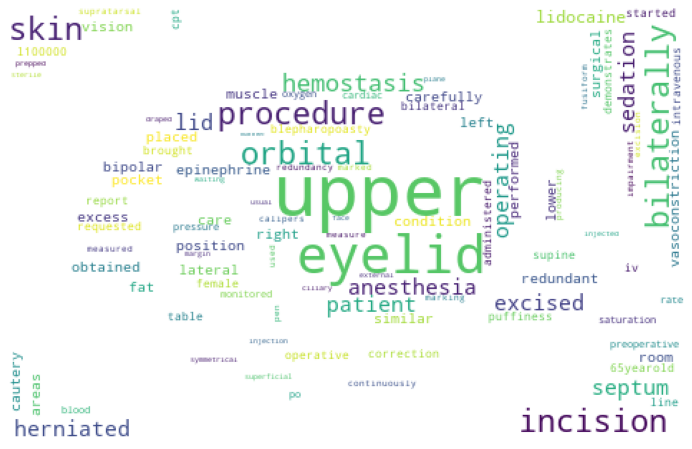

In [245]:
# Generate word cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# convert list to string. 
string = ' '.join([str(item) for item in text_lower])

# create mask for our wordcloud.
mask = np.array(Image.open('eye.jpg'))

# For this wordcloud, we grab max of top 100 words.
wordcloud = WordCloud(    
                          mask=mask,
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(string))

fig = plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


The bigger the text, the bigger the frequency in the corpus. Seems like it identified hemostasis for bilateral upper eyelid.

# **Part of Speech Tagging (NLTK)**


Part of Speech is the classification of words based on their role in the sentence. The major POS tags are Nouns, Verbs, Adjectives, Adverbs. This category provides more details about the word and its meaning in the context.

In [ ]:
# download our tagger for POS.
# Uses the penn treebank tagset
# https://www.sketchengine.eu/penn-treebank-tagset/
nltk.download('averaged_perceptron_tagger')

NLTK uses the average perceptron tagger by default. Something to consider is to experiment with other taggers such as Stanford or Maxent. Reason being is that NLTK biased to treating some adjectives as nouns.

In [247]:
# Here we use tokens to be able to display the prepositions and tag
# each word in the original corpus.
tagged = nltk.pos_tag(tokens)
tagged

[('Operative', 'JJ'),
 ('Report', 'NNP'),
 ('Procedure', 'NNP'),
 ('Bilateral', 'NNP'),
 ('upper', 'NNP'),
 ('lid', 'VBD'),
 ('blepharopoasty', 'JJ'),
 ('CPT', 'NNP'),
 ('15822', 'CD'),
 ('Anesthesia', 'NNP'),
 ('Lidocaine', 'NNP'),
 ('with', 'IN'),
 ('l100000', 'NN'),
 ('epinephrine', 'NN'),
 ('This', 'DT'),
 ('65yearold', 'CD'),
 ('female', 'JJ'),
 ('demonstrates', 'NNS'),
 ('conditions', 'NNS'),
 ('of', 'IN'),
 ('excess', 'NN'),
 ('and', 'CC'),
 ('redundant', 'NN'),
 ('eyelid', 'JJ'),
 ('skin', 'NN'),
 ('with', 'IN'),
 ('puffiness', 'NN'),
 ('and', 'CC'),
 ('has', 'VBZ'),
 ('requested', 'VBN'),
 ('surgical', 'JJ'),
 ('correction', 'NN'),
 ('The', 'DT'),
 ('patient', 'NN'),
 ('was', 'VBD'),
 ('brought', 'VBN'),
 ('into', 'IN'),
 ('the', 'DT'),
 ('operating', 'NN'),
 ('room', 'NN'),
 ('and', 'CC'),
 ('placed', 'VBN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('supine', 'JJ'),
 ('position', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('operating', 'NN'),
 ('table', 'NN'),
 ('An', 'DT'),
 ('intraveno

Ok, so enough exploration and now I present the following keyword extraction techniques...

# **The Techniques** 

Different techniques used to extract keywords

# **Keyword Extraction Technique : Rake**

RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

In [ ]:
!pip install rake-nltk

In [249]:
# Usage
from rake_nltk import Metric, Rake

r = Rake(
    ranking_metric=Metric.WORD_DEGREE,
    stopwords=stop_words,
    max_length=3,
)
r.extract_keywords_from_text(text_clean)

In [250]:
# If i wanted to get keywords and phrases...
r.get_ranked_phrases()

['upper eyelid incisions',
 'upper eyelid areas',
 'left upper eyelid',
 'right upper eyelid',
 'redundant eyelid skin',
 'upper lid areas',
 'upper',
 'obtain perfect hemostasis',
 'fashion careful hemostasis',
 'blunt dissection hemostasis',
 'herniated orbital fat',
 'lower eyelids bilaterally',
 'ciliary margin bilaterally',
 'bipolar cautery unit',
 'redundant skin',
 'preoperative po sedation',
 'orbicularis oculi muscle',
 'extraocular muscle movements',
 'requested surgical correction',
 'herniated fat',
 'hemostasis',
 'bipolar cautery',
 'bilaterally injected',
 'usual sterile manner',
 'stalk meticulously cauterized',
 'sedation anesthesia',
 'removing skin',
 'oxygen saturation continuously',
 'completed without complication',
 'approximately ten minutes',
 'abnormally protruding positions',
 'supratarsal incisions',
 'patient left',
 'lateral vision',
 'surgical calipers',
 'orbital septum',
 'carefully excised',
 'sedation',
 'patientʼs vision',
 'operating table',
 'oper

The results for rake are dependent on having other keywords not just one. If its only one then you get a list that goes through your keywords in descending order.

# **Keyword Extraction Technique : TF-IDF**

Classic algorithm which is short for term frequency–inverse document frequency. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [251]:
#import the TfidfVectorizer from Scikit-Learn.
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=.65, min_df=1, use_idf=True, norm=None, max_features=10)
transformed_documents = vectorizer.fit_transform(text_lower)

In [252]:
transformed_documents_as_array = transformed_documents.toarray()

In [253]:
# loop each item in transformed_documents_as_array, using enumerate to keep track of the current position
for counter, doc in enumerate(transformed_documents_as_array):
    # construct tuples.
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))

In [254]:
tf_idf_tuples

[('bilaterally', 0.0),
 ('excised', 0.0),
 ('eyelid', 0.0),
 ('hemostasis', 0.0),
 ('orbital', 0.0),
 ('procedure', 0.0),
 ('sedation', 0.0),
 ('septum', 0.0),
 ('skin', 0.0),
 ('upper', 0.0)]

This result seems similar to our wordcloud results. This and rake rely on frequency of word count for ranking so let's try something else.

# **Keyword Extraction Technique : TopicRank**

First up would be TopicRank. TopicRank is an unsupervised method that aims to extract keyphrases from the most important topics of a document. They say that this technique is an improvement of the TextRank method applied to keyphrase extraction. Topics, in this case, are defined as clusters of similar keyphrase candidates. 

We will lift out an [implementation through pypi.](https://pypi.org/project/topicrankpy/)


In [ ]:
# We will use a specific library that works on colab.
!pip install topicrankpy
!pip install git+https://github.com/boudinfl/pke.git

In [256]:
from topicrankpy import extractinformation as t

In [257]:
number_of_phrases = 10
t.top_phrases_extraction('report_english.docx', number_of_phrases)

[('orbital septum', 0.02637746219670481),
 ('patient', 0.02045432891334531),
 ('excess', 0.019459074221183623),
 ('upper', 0.018332455051769583),
 ('anesthesia', 0.017863129636011426),
 ('similar procedure', 0.017835331727677005),
 ('hemostasis', 0.017535239440597056),
 ('incisions', 0.0172933030100657),
 ('operating room', 0.014703681914043538),
 ('procedure', 0.014612462188627492)]

If we didn't rely on frequency and the goal is to just extract keywords, then these are the top 10 phrases or words suggested that is according to its corresponding significant score. 

Candidate weighting, in the case of TopicRank, uses a random walk algorithm so expect a stochastic or random process.

# **Keyword Extraction Technique : BERT**

Maybe we want to convert our documents to vectors to capture their meaning. So why not use BERT embeddings? Here we are using SentenceTransformers - a Python framework for state-of-the-art sentence, text and image embeddings.

In [ ]:
# Grab this library from sentencebert.
!pip install sentence-transformers

In [259]:
# Import CountVectorizer from scikit-learn.
from sklearn.feature_extraction.text import CountVectorizer

# This value we can set it to however we want. For n_gram_range,
# if we change the size of the candidate to '3,3' then it means 
# we have a result of 3 keywords.
n_gram_range = (1, 1)

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([text])
candidates = count.get_feature_names()

In [260]:
# Import SentenceTransformer from sbert.
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([text])
candidate_embeddings = model.encode(candidates)

One thing to consider experimenting within the use of SentenceTransformer is to use other [pretrained bert models](https://www.sbert.net/docs/pretrained_models.html). My initial try was with distillbert and it seems to be ok. I tried xlm and this felt much more accurate. 

In [261]:
# Here we use cosine similarity to determine the keywords through calculating
# the distance between our document and candidate embeddings.
from sklearn.metrics.pairwise import cosine_similarity

top_n = 10
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

In [262]:
keywords

['ptosis',
 'lidocaine',
 'cardiac',
 'intravenous',
 'patient',
 'herniated',
 'surgical',
 'anesthesia',
 'hemostasis',
 'hematomas']

So according to BERT, these are top 10 keywords of the document. Seems to do well in terms of capturing semantics and keyword identification.